In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
df = pd.read_csv('/content/drive/MyDrive/ML IPYNB 2021/car data.csv')

In [54]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [55]:
df.shape

(301, 9)

In [ ]:
df.dtypes == 'O'

Car_Name          True
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type         True
Seller_Type       True
Transmission      True
Owner            False
dtype: bool

In [ ]:
# code to pick only categorical variables
l= df.loc[:, df.dtypes == 'O']
l

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
296,city,Diesel,Dealer,Manual
297,brio,Petrol,Dealer,Manual
298,city,Petrol,Dealer,Manual
299,city,Diesel,Dealer,Manual


In [ ]:
for i in l:
    print(df[i].unique())

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

In [6]:
##check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [56]:
df['current_yr'] = 2020

In [57]:
df['years of service'] = df.current_yr - df.Year

In [58]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [59]:
df_final = df.copy()
df_final.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_yr,years of service
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [60]:
df_final.drop('Year',axis =1,inplace = True)
df_final.drop('current_yr',axis =1,inplace = True)


In [11]:
df_final.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years of service
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [61]:
col = ['Fuel_Type','Seller_Type','Transmission']
df_final =pd.get_dummies(df_final,columns = col,drop_first= True)


In [62]:
df_final.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,years of service,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,6,0,1,0,1
1,sx4,4.75,9.54,43000,0,7,1,0,0,1
2,ciaz,7.25,9.85,6900,0,3,0,1,0,1
3,wagon r,2.85,4.15,5200,0,9,0,1,0,1
4,swift,4.60,6.87,42450,0,6,1,0,0,1


In [63]:
cnt = df_final['Car_Name'].value_counts()
cnt.iloc[0:10]


city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
i20                           9
ciaz                          9
innova                        9
grand i10                     8
Royal Enfield Classic 350     7
Name: Car_Name, dtype: int64

In [64]:
df_final.drop('Car_Name',axis=1,inplace = True)

In [65]:
df_final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years of service,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [66]:
df_final.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'years of service', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

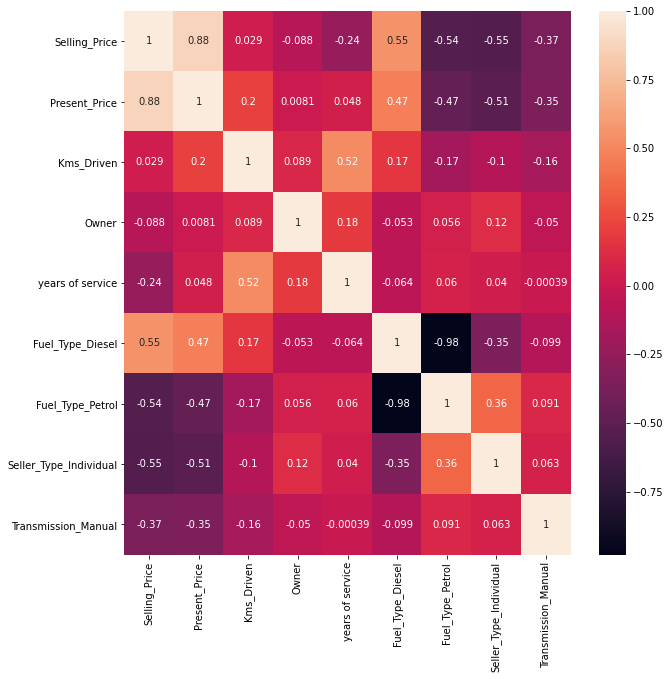

In [67]:
plt.figure(figsize=(10,10))
sns.heatmap(df_final.corr(),annot = True)
plt.show()

In [92]:
y = df_final['Selling_Price']
x = df_final.drop('Selling_Price',axis = 1)

In [93]:
from sklearn.model_selection import train_test_split
x_tr,x_test,y_tr,y_test = train_test_split(x,y,test_size = 0.3)

In [88]:
x_tr.shape


(210, 8)

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_tr)

array([[-0.87012558, -0.72974006, -0.16245911, ...,  0.48507125,
         1.38443731,  0.39223227],
       [ 0.33521362, -0.47363483, -0.16245911, ..., -2.06155281,
        -0.72231512,  0.39223227],
       [-0.95556735,  0.13635087, -0.16245911, ...,  0.48507125,
         1.38443731,  0.39223227],
       ...,
       [-0.97296085, -0.79416005, -0.16245911, ...,  0.48507125,
         1.38443731,  0.39223227],
       [-1.01964867, -0.48398974, -0.16245911, ...,  0.48507125,
         1.38443731, -2.54950976],
       [-0.06300604,  0.44652117,  3.62825342, ..., -2.06155281,
        -0.72231512,  0.39223227]])

In [95]:
scaler.transform(x_test)

array([[-1.01659718e+00, -7.32125989e-01, -1.62459108e-01,
        -1.20911550e+00, -4.77566933e-01,  4.85071250e-01,
         1.38443731e+00,  3.92232270e-01],
       [-5.72605143e-01, -5.43637881e-01,  3.62825342e+00,
        -1.62765548e-01, -4.77566933e-01,  4.85071250e-01,
         1.38443731e+00,  3.92232270e-01],
       [-1.01201994e+00, -3.40834219e-01,  3.62825342e+00,
         5.34801088e-01, -4.77566933e-01,  4.85071250e-01,
         1.38443731e+00,  3.92232270e-01],
       [-2.46095536e-01, -2.93115711e-01, -1.62459108e-01,
        -1.62765548e-01, -4.77566933e-01,  4.85071250e-01,
        -7.22315119e-01,  3.92232270e-01],
       [-1.11306791e-02, -6.39575942e-01, -1.62459108e-01,
        -1.20911550e+00, -4.77566933e-01,  4.85071250e-01,
        -7.22315119e-01,  3.92232270e-01],
       [-9.70824804e-01, -3.40834219e-01, -1.62459108e-01,
        -8.60332185e-01, -4.77566933e-01,  4.85071250e-01,
         1.38443731e+00,  3.92232270e-01],
       [-9.75402041e-01,  6.477310

In [120]:
from sklearn.ensemble import ExtraTreesRegressor
model_xt = ExtraTreesRegressor().fit(x_tr,y_tr)
y_pred = model_xt.predict(x_test)


In [121]:
print(model_xt.feature_importances_)

[0.36261554 0.05025453 0.00065272 0.11986473 0.04047349 0.00859643
 0.35348301 0.06405955]


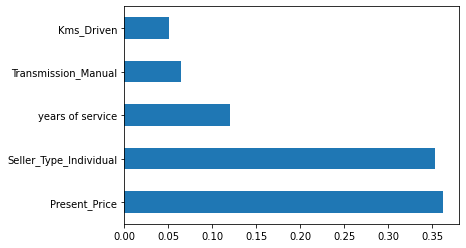

In [122]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_xt.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [123]:
from sklearn import metrics
print('R-Square:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square: 0.8125828627437088
MAE: 0.9841978021978025
MSE: 9.012433354285713
RMSE: 3.0020715105216453


In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


clf = RandomizedSearchCV(model,random_grid,scoring='neg_mean_squared_error', \
                        n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs =-1)

In [136]:
clf.fit(x_tr,y_tr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   33.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [137]:
clf.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

In [138]:
clf.best_score_

-1.5207932394268808

In [139]:
y_pred = clf.predict(x_test)

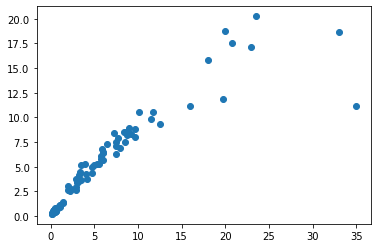

In [140]:
plt.scatter(y_test,y_pred)

In [141]:
from sklearn import metrics
print('R-Square:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square: 0.7811436952432326
MAE: 1.1197271175649786
MSE: 10.524266295287253
RMSE: 3.2441125589731397
